# 209. Перестановки

Есть два метода генерации случайных перестановок длины 8 — правильный и творческий. Код этих методов приведён ниже.

```
def RandomPermutation():
    perm = list(range(8))
    random.shuffle(perm)
    return perm

def StupidPermutation():
    partialSums = [0,1,8,35,111,285,
        628,1230,2191,3606,5546,8039,11056,14506,18242,  
        22078,25814,29264,32281,34774,36714,38129,39090,  
        39692,40035,40209,40285,40312,40319,40320]
    r = random.randint(0, partialSums[-1])
    numInv = 0
    while partialSums[numInv] < r:
        numInv += 1
    perm = list(range(8))
    for step in range(numInv):
        t1 = random.randint(0, 7)
        t2 = random.randint(0, 7)
        perm[t1], perm[t2] = perm[t2], perm[t1]
    return perm
```

Есть два метода генерации случайных перестановок длины 8 — правильный и творческий. Код этих методов приведён ниже.

В правильном методе генерируется случайная перестановка. В творческом сначала выбирается число $numInv$, соответствующее доле неправильно упорядоченных пар чисел в случайной перестановке. Массив $partialSums$ выбран таким образом, что распределение величины $numInv$ получается правильным.

Дальше допущена ошибка, в результате которой не все перестановки будут получаться с одинаковыми вероятностями. Получив достаточно большое количество перестановок, сгенерированных одним из методов, можно угадать, что это был за метод.

В этой задаче по набору из $1000$ перестановок необходимо определить, каким методом он был получен. Дано $n$ таких наборов, нужно отсортировать их так, чтобы сначала шли хорошие наборы, а потом творческие.

Решение засчитывается, если среди всех пар наборов (хороший, творческий), хотя бы 98% идёт в правильном порядке (детали в примечании).

**Формат ввода**

Файл `permutations.in` находится в архиве, доступном по адресу.

В первой его строке указано одно число $n$ — количество наборов перестановок. В каждой из следующих $1000n$ строк указано по перестанове чисел от 0 до 7. Первая $1000$ строк соответствет первому набору перестановок, вторая $1000$ второму и т.д.

**Формат вывода**

Выведите $n$ чисел — в $i$-ой строке должен быть указан номер набора перестановок (от $0$ до $n−1$). Сначала должны идти номера хороших наборов, потом творческих.

**Примечание**

Для определения корректности ответа вычисляются две величины:
- $total$: количество пар индексов $i<j$ таких, что генераторы для наборов $i$ и $j$ различны;
- $good$: количество пар индексов $i<j$ таких, что генератор для набора $i$ "хороший", а для $j$ "творческий".

Ответ считается корректным, если $\frac{total}{good} ≥ 0.98$.

## Решение

Так как сказано, что во второй функции есть ошибка: не все перестановки происходят равномерно — одни могут происходить чаще, а другие — реже. 

Задача похожа на "Генератор точек в круге", т.е. надо найти какую-то математическую или геометрическую особенность генерации в каждой функции.

Давайте сгенерируем 100000 тупых перестановок и посчитаем, как часто каждое из чисел (0-7) помещалось на каждую позицию (0-7).



In [12]:
import random

def RandomPermutation():
    perm = list(range(8))
    random.shuffle(perm)
    return perm

def StupidPermutation():
    partialSums = [0,1,8,35,111,285,
        628,1230,2191,3606,5546,8039,11056,14506,18242,
        22078,25814,29264,32281,34774,36714,38129,39090,
        39692,40035,40209,40285,40312,40319,40320]
    r = random.randint(0, partialSums[-1])
    numInv = 0
    while partialSums[numInv] < r:
        numInv += 1
    perm = list(range(8))
    for step in range(numInv):
        t1 = random.randint(0, 7)
        t2 = random.randint(0, 7)
        perm[t1], perm[t2] = perm[t2], perm[t1]
    return perm

In [15]:
good = pd.DataFrame([RandomPermutation() for i in range(10000)])
stupid = pd.DataFrame([StupidPermutation() for i in range(10000)])

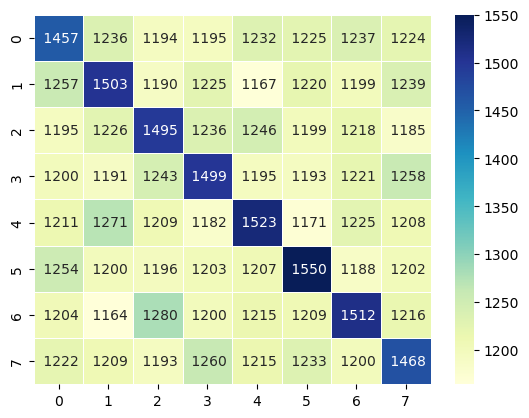

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

cnt_stupid = stupid.apply(stupid.value_counts)

sns.heatmap(cnt_stupid, linewidth=0.5, cmap="YlGnBu", annot= True, fmt=" d")
plt.show()

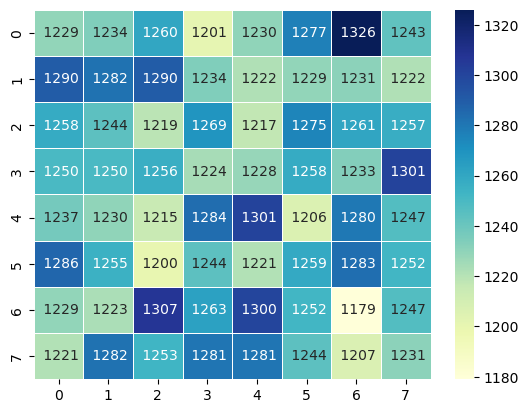

In [17]:
cnt_good = good.apply(good.value_counts)

sns.heatmap(cnt_good, linewidth=0.5, cmap="YlGnBu", annot= True, fmt=" d")
plt.show()

Столбцы в матрице представляют числа, а строки - позиции. Таким образом, число в каждой ячейке означает, сколько раз каждое число было на каждой позиции.

Из матрицы видно, что ошибка в тупой перестановке приводит к тому, что некоторые числа чаще остаются на исходной позиции, чем это должно быть, если бы все перестановки были распределены равномерно. Например, 0 остается на позиции 0, 1 на позиции 1, 2 на позиции 2 и т. д.

In [18]:
with open('permutations.in') as f:
    n = int(next(f).split()[0])
    array = [[int(x) for x in line.split()] for line in f]

In [5]:
import pandas as pd

df = pd.DataFrame(array)
df

,0,1,2,3,4,5,6,7
0,5,0,3,7,4,2,6,1
1,2,3,5,1,6,7,4,0
2,2,7,4,0,5,1,6,3
3,2,5,1,0,7,4,3,6
4,0,6,4,5,1,2,7,3
...,...,...,...,...,...,...,...,...
199995,0,6,5,7,2,3,4,1
199996,6,1,5,2,3,0,4,7
199997,4,3,6,7,2,0,5,1
199998,4,1,2,0,3,7,6,5


In [19]:
suspecious_permutations = (df[0] == 0) | (df[1] == 1) | (df[2] == 2) | (df[3] == 3) \
                        | (df[4] == 4) | (df[5] == 5) | (df[6] == 6) | (df[7] == 7)

In [20]:
suspecious_permutations_count = suspecious_permutations.rolling(window=1000) \
    .sum()[999::1000] \
    .astype(int) \
    .to_frame() \
    .reset_index(drop=True) \
    .sort_values(0) \
    .rename({0: 'count'}, axis=1)

suspecious_permutations_count.head(10)

,count
66,600
106,604
119,605
91,606
199,608
184,608
164,608
186,610
74,611
31,611
